# LaunchCode Data Analytics Capstone Project 
## Fatemeh Mardi (Sep 2021 cohort)

I chose to work on a national data set from https://nces.ed.gov/surveys/hsls09/. The "High School Longitudinal Study of 2009" is a nationally representative, longitudinal study of 23,000+ 9th graders from 944 schools beginning in 2009.

I narrowed down the variables in the data set to only include some descriptive data of the students (ID, sex, race, SES, math score) and four composite variables related to math learning (math identity, math utilitiy, math efficacy, and math interest).



**Business issue:** There is more to math than just a score. While educators and administrators know this, the impact of influential factors on math achievement scores is not clear enough for action to take place.
I want to explore public data collected from students across the nation to explore the constructs below and how they influence the math proficiency of students (across gender, race, and socio-economic status).


## Getting Started and initial cleaning and run through of the data


•	Student ID : unique identifier
•	Sex X2SEX (1=male, 2=female)
•	Race X2RACE (1= Native, 2=Asian, 3=Black, 4&5=Hispanic, 6=More than one race, 7=Hawaiian/Pacific Islander, 8=White)
•	SES quintile X2SESQ5 (5= highest quintile)

•	Math score quintile X2TXMQUINT (5= highest)
•	Math identity X2MTHID (I am a math person.)
•	Math utility X2MTHUTI (Math is useful.)
•	Math efficacy X2MTHEFF (I am confident in my ability to do math.)
•	Math interest X2MTHINT (I am interested in and enjoy math.)


In [8]:
#import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

data = pd.read_csv("Math.csv")
data

,STU_ID,X2SEX,X2RACE,X2SESQ5,X2TXMQUINT,X2MTHID,X2MTHUTI,X2MTHEFF,X2MTHINT_R
0,10001,1,8,5,5,0.16,1.21,1.73,-0.21
1,10002,2,8,2,4,-0.42,-0.50,-0.70,-0.60
2,10003,2,3,5,4,-1.54,-0.90,-0.56,-1.39
3,10004,2,8,2,-8,-8.00,-8.00,-8.00,-8.00
4,10005,1,8,5,3,-9.00,-9.00,-9.00,-9.00
...,...,...,...,...,...,...,...,...,...
23498,35202,2,5,4,4,0.70,0.80,0.11,-7.00
23499,35203,2,5,1,3,-0.42,1.21,0.11,-0.60
23500,35204,2,8,3,3,-0.42,1.21,1.73,0.31
23501,35205,1,8,5,3,-1.54,-3.94,-1.30,-1.89


In [2]:
data.describe()
#describe for a summary of stats

data.columns
#to recall the exact spelling of each column

data.shape
#for the number of rows and columns

data.info()
#to check the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23503 entries, 0 to 23502
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STU_ID      23503 non-null  int64  
 1   X2SEX       23503 non-null  int64  
 2   X2RACE      23503 non-null  int64  
 3   X2SESQ5     23503 non-null  int64  
 4   X2TXMQUINT  23503 non-null  int64  
 5   X2MTHID     23503 non-null  float64
 6   X2MTHUTI    23503 non-null  float64
 7   X2MTHEFF    23503 non-null  float64
 8   X2MTHINT_R  23503 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 1.6 MB


In [3]:
#-8 not respond, -9 is missing ==> needs cleaning
#I need to do this for all five variables. INT also has (-7) that needs cleaning.
#I chose to create a for loop.


cols=['X2MTHID', 'X2MTHUTI', 'X2MTHEFF', 'X2MTHINT_R']
data1= data
for col in cols: 
    data1=data1[data1[col] != -7]
    data1=data1[data1[col] != -8]
    data1=data1[data1[col] != -9]
data1

#now the dataset does not have any missing/skipped items. 23503 --> 16218 rows


#to reset the number of rows (first column)
data1.reset_index(drop=True, inplace=True)
data1
#data1 is cleaned.

,STU_ID,X2SEX,X2RACE,X2SESQ5,X2TXMQUINT,X2MTHID,X2MTHUTI,X2MTHEFF,X2MTHINT_R
0,10001,1,8,5,5,0.16,1.21,1.73,-0.21
1,10002,2,8,2,4,-0.42,-0.50,-0.70,-0.60
2,10003,2,3,5,4,-1.54,-0.90,-0.56,-1.39
3,10007,2,8,4,2,0.12,0.38,-1.09,-0.47
4,10009,1,8,4,5,0.70,-0.50,0.32,-1.25
...,...,...,...,...,...,...,...,...,...
16213,35200,1,8,5,5,1.82,0.80,1.73,2.17
16214,35203,2,5,1,3,-0.42,1.21,0.11,-0.60
16215,35204,2,8,3,3,-0.42,1.21,1.73,0.31
16216,35205,1,8,5,3,-1.54,-3.94,-1.30,-1.89


In [4]:
#I want to filter these students sex=2 female, race= 1-7 (non-dominant)
#Show the mean of these "identity, utility, efficacy, and interest" > 0


df_fnondom = data1[(data1['X2SEX']==2) & (data1['X2RACE'] != 8)]
df_fnondom

#3519 non-dominant females as a subgroup
#created a df called df_fnondom = non-dominant females.

,STU_ID,X2SEX,X2RACE,X2SESQ5,X2TXMQUINT,X2MTHID,X2MTHUTI,X2MTHEFF,X2MTHINT_R
2,10003,2,3,5,4,-1.54,-0.90,-0.56,-1.39
15,10026,2,2,2,5,-0.42,0.80,-0.35,0.96
19,10031,2,3,3,1,0.70,-0.09,-0.79,-0.19
22,10039,2,2,4,1,1.82,1.21,0.32,0.48
27,10049,2,5,4,5,1.82,1.21,0.32,1.38
...,...,...,...,...,...,...,...,...,...
16205,35191,2,3,2,1,-1.54,1.21,0.11,-0.60
16206,35193,2,5,3,3,0.70,0.13,0.32,0.19
16209,35196,2,5,4,4,-1.54,-0.50,0.32,-0.85
16212,35199,2,5,1,1,0.16,0.80,0.18,0.96


In [5]:
#What is the distribution of the on-dominant females groups's race 1-7?
#groupby category of race, and counted the number of Stu ID

df_fnondom.groupby(['X2RACE']).count().sort_values(by=['STU_ID'], ascending = False)


#df.sort_values(by=['col1'])
#Sorted StuID to show values descending order

,STU_ID,X2SEX,X2SESQ5,X2TXMQUINT,X2MTHID,X2MTHUTI,X2MTHEFF,X2MTHINT_R
X2RACE,,,,,,,,
5,1213,1213,1213,1213,1213,1213,1213,1213
3,753,753,753,753,753,753,753,753
2,712,712,712,712,712,712,712,712
6,704,704,704,704,704,704,704,704
4,51,51,51,51,51,51,51,51
1,49,49,49,49,49,49,49,49
7,37,37,37,37,37,37,37,37


In [6]:
df_fnondom.mean()
#just exploring, looking for to get an idea of their overall SES and score first.

STU_ID        22849.803922
X2SEX             2.000000
X2RACE            4.115942
X2SESQ5           3.076158
X2TXMQUINT        3.216823
X2MTHID           0.031444
X2MTHUTI          0.056221
X2MTHEFF          0.027366
X2MTHINT_R        0.089952
dtype: float64

In [7]:
#analyzing SES: What percentage of the non-dominant females, average or above in their math scores?

dfSES = df_fnondom.groupby(['X2SESQ5']).count().sort_values(by=['STU_ID'], ascending = False)

#3,4,5 = % of total --> SES ?% average and above 

100*len(df_fnondom[df_fnondom['X2SESQ5']>2])/len(df_fnondom)
#Claim = 61.95% of them are average or above average

61.949417448138675

## Procedural cleaning of the data and noticing outliers


•	Missing Data
•	Irregular Data (detecting outliers)
•   Unnecessary Data
•   Inconsistent Data


In [9]:
# read the data
df = pd.read_csv('cleanmath.csv')
df

,Unnamed: 0,STU_ID,X2SEX,X2RACE,X2SESQ5,X2TXMQUINT,X2MTHID,X2MTHUTI,X2MTHEFF,X2MTHINT_R
0,0,10001,1,8,5,5,0.16,1.21,1.73,-0.21
1,1,10002,2,8,2,4,-0.42,-0.50,-0.70,-0.60
2,2,10003,2,3,5,4,-1.54,-0.90,-0.56,-1.39
3,3,10007,2,8,4,2,0.12,0.38,-1.09,-0.47
4,4,10009,1,8,4,5,0.70,-0.50,0.32,-1.25
...,...,...,...,...,...,...,...,...,...,...
16213,16213,35200,1,8,5,5,1.82,0.80,1.73,2.17
16214,16214,35203,2,5,1,3,-0.42,1.21,0.11,-0.60
16215,16215,35204,2,8,3,3,-0.42,1.21,1.73,0.31
16216,16216,35205,1,8,5,3,-1.54,-3.94,-1.30,-1.89


<AxesSubplot:xlabel='index'>

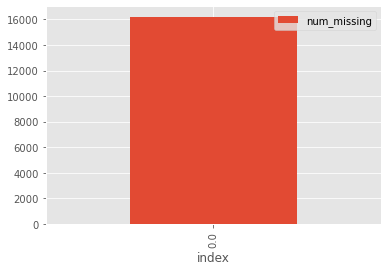

In [10]:
#Missing Data
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [11]:
#Irregular data
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
STU_ID - 0%
X2SEX - 0%
X2RACE - 0%
X2SESQ5 - 0%
X2TXMQUINT - 0%
X2MTHID - 0%
X2MTHUTI - 0%
X2MTHEFF - 0%
X2MTHINT_R - 0%
num_missing - 0%


In [13]:
#Unnecessary Data
#I took almost all of the columns of the original dataset.
#There was a lot of unnecesary data that I removed for this project (in the first section).

<AxesSubplot:>

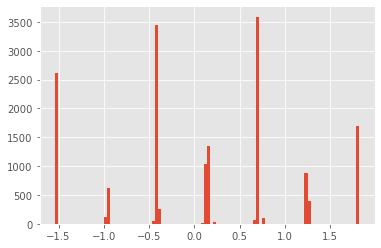

In [14]:
#Inconsistent Data

# histogram Variable 1 Math Identity
df['X2MTHID'].hist(bins=100)

<AxesSubplot:>

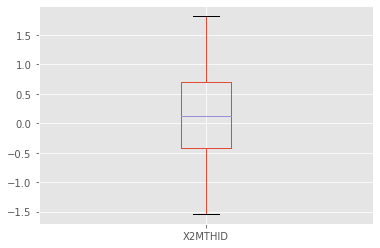

In [15]:
# box plot Varibale 1 Math Identity
df.boxplot(column=['X2MTHID'])

<AxesSubplot:>

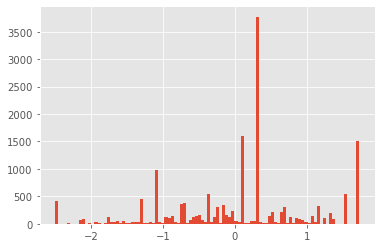

In [16]:
# histogram Variable 2 Math Efficacy
df['X2MTHEFF'].hist(bins=100)

#noticing a clear skew

<AxesSubplot:>

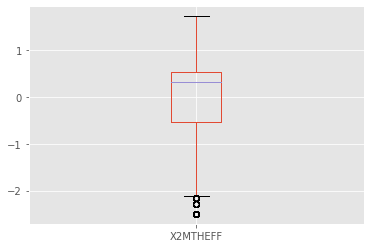

In [17]:
# box plot Variable 2 Math Efficacy
df.boxplot(column=['X2MTHEFF'])

#The outliers are clear here as well.

<AxesSubplot:>

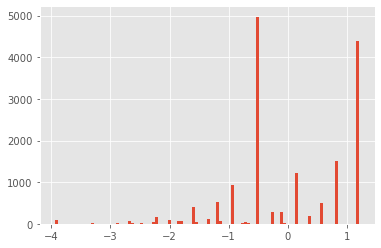

In [18]:
# histogram Variable 3 Math Utility
df['X2MTHUTI'].hist(bins=100)

#noticing bimodal shape

<AxesSubplot:>

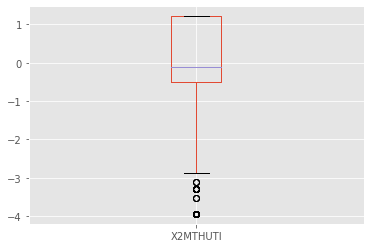

In [19]:
# box plot Variable 3 Math Utility
df.boxplot(column=['X2MTHUTI'])

#clear outliers on the negative side

<AxesSubplot:>

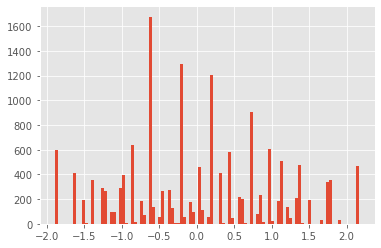

In [20]:
# histogram Variable 4 Math Interest
df['X2MTHINT_R'].hist(bins=100)

#The two ends aren't as low as a normal distrubition might have. That interests me.

<AxesSubplot:>

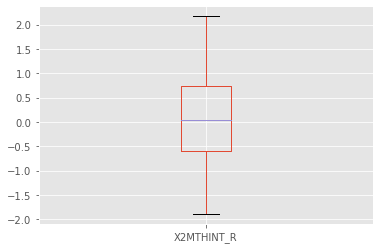

In [21]:
# box plot Variable 4 Math Interest
df.boxplot(column=['X2MTHINT_R'])

## Modeling data (predictive analysis): Correlations and linear regression models


•	The pairplots are not suitable for this data, but I left them in for future reference.

•	The heatmaps show the correlations visually. 

•   The boxplot was the most helpful in visually revealing two groups of outliers.

•   The barplots need to be further examined.


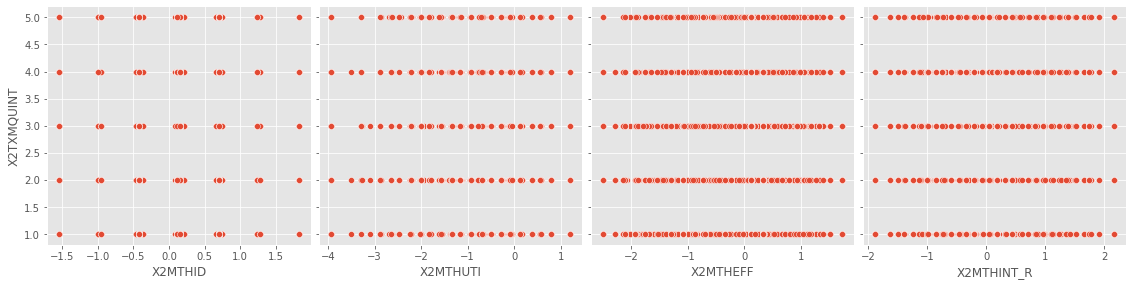

In [23]:
sns.pairplot(df, x_vars=['X2MTHID', 'X2MTHUTI','X2MTHEFF', 'X2MTHINT_R'], 
             y_vars='X2TXMQUINT', height=4, aspect=1, kind='scatter')
plt.show()

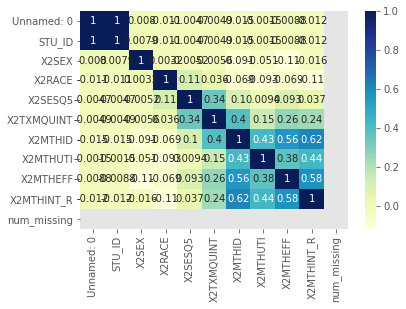

In [24]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

#0.62 = identity and interest *
#0.56 = identity and efficacy *
#0.43 = identity and utility
#0.40 = identity and score

#0.34 = score and SES
#0.58 = efficacy and interest *

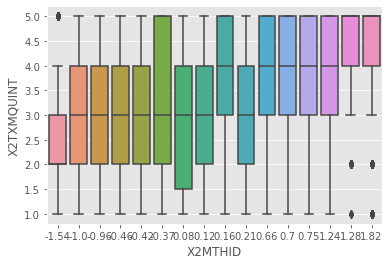

In [25]:
ax = sns.boxplot(x='X2MTHID', y='X2TXMQUINT', data=df)

#Pairplots were not giving me any information. So I chose to show my categorical data (score quintiles)
#using a boxplot and a barplot.

<AxesSubplot:xlabel='X2MTHID', ylabel='X2TXMQUINT'>

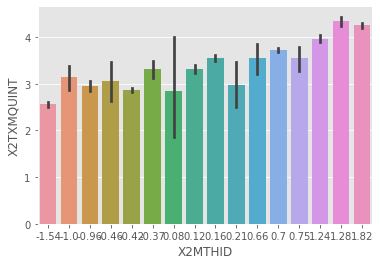

In [26]:
sns.barplot(x='X2MTHID',y='X2TXMQUINT',data=df)

#look into barplot to see what it's actually revealing.

In [27]:
#The outliers caught my attention, so I created a subset to show the low performing, high math identoty group.


#HighConfidence == 'X2MTHID'>= 1.28 and y='X2TXMQUINT'<=2

#df_HC = df['HighConfidence']
#how to create a subset

df_HC = df[(df['X2MTHID']>=1.28) & (df['X2TXMQUINT'] <= 2)]
df_HC

#We created a 20 subset of falsely confident folks

,Unnamed: 0,STU_ID,X2SEX,X2RACE,X2SESQ5,X2TXMQUINT,X2MTHID,X2MTHUTI,X2MTHEFF,X2MTHINT_R,num_missing
22,22,10039,2,2,4,1,1.82,1.21,0.32,0.48,0.0
70,70,10121,1,6,5,2,1.28,1.21,0.91,1.11,0.0
115,115,10192,1,7,2,2,1.82,1.21,1.73,1.75,0.0
253,253,10402,1,3,5,1,1.82,0.38,1.73,0.22,0.0
342,342,10543,1,8,2,2,1.82,1.21,1.73,1.77,0.0
...,...,...,...,...,...,...,...,...,...,...,...
15938,15938,34773,1,5,3,2,1.28,0.16,0.32,0.71,0.0
16031,16031,34928,2,8,1,1,1.28,1.21,0.96,1.10,0.0
16076,16076,34997,1,3,4,1,1.82,1.21,1.03,1.10,0.0
16079,16079,35005,2,2,4,2,1.28,-0.09,0.58,0.96,0.0


## Creating my linear regression model

I used the two columns with the strongest correlation to create and train the model. 
0.62 = identity and interest *
As I am looking for ways to increase math identity of students and find contributins factors, identity is the y.

In [28]:
X = df['X2MTHINT_R']
y = df['X2MTHID']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [29]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

#the constant is 0.069459 and the coefficient is 0.615343.

const         0.069459
X2MTHINT_R    0.615343
dtype: float64

In [30]:
lr.summary()
#Notice the R-Squared, Fstatistic, and p value.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                X2MTHID   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     6767.
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:01:44   Log-Likelihood:                -13663.
No. Observations:               11352   AIC:                         2.733e+04
Df Residuals:                   11350   BIC:                         2.734e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0695      0.008      9.177      0.000       0.055       0.084
X2MTHINT_R     0.6153      0.007     82.263      0.000       0.601       0.630
==============================================================================
Omnibus:                        1.087   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                1.070
Skew:                           0.023   Prob(JB):                        0.586
Kurtosis:                       3.010   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

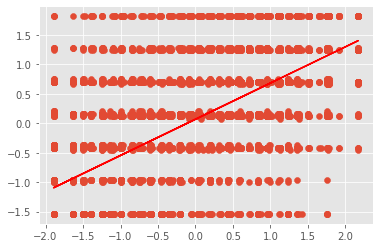

In [31]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 0.069459 + 0.615343*X_train, 'r')
plt.show()

## Error Terms


<Figure size 432x288 with 0 Axes>

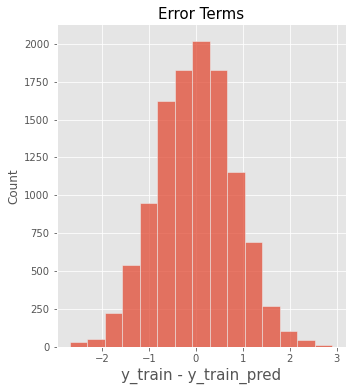

In [32]:
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure()
sns.displot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

#Having the errors in a normal distribution is good.

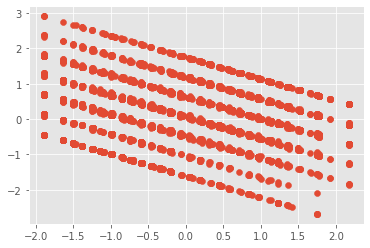

In [33]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

#Having such clear patterns is not optimal.

## Multiple linear regression

My R-squared value is 0.374. 

Considering the high correlation among these three variables, I think a multiple linear regression would be more effective.
0.62 = identity and interest *
0.56 = identity and efficacy *
0.58 = efficacy and interest *

In [34]:
#https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c

from sklearn.linear_model import LinearRegression

# create linear regression object
mlr = LinearRegression()

# fit linear regression
Z = df[['X2MTHINT_R', 'X2MTHEFF']]
#mlr.fit(df[['X2MTHINT_R', 'X2MTHEFF']], df['X2MTHID'])
mlr.fit(df[['X2MTHINT_R', 'X2MTHEFF']], df['X2MTHID'])


# get the slope and intercept of the line best fit.
print(mlr.intercept_)

print(mlr.coef_)

#Identity = 0.04619677633019906 + 0.44037172*interest + 0.31747315*efficacy

0.04619677633019906
[0.44037172 0.31747315]


C:\Users\fhfk6.UM-AD\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\fhfk6.UM-AD\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


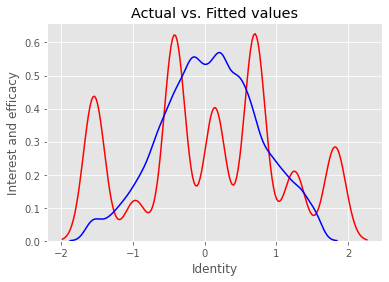

In [36]:
#from p. 82 of https://docs.google.com/document/d/1vd91W7lqKFxkwLDhj_Zr71ZUPpgZbTC6bauH6sjU-1U/edit

Y_hat = mlr.predict(Z)

plt.figure

ax1 = sns.distplot(df['X2MTHID'], hist=False, color="r", label="Actual value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted values", ax=ax1)

plt.title('Actual vs. Fitted values')
plt.xlabel('Identity')
plt.ylabel('Interest and efficacy')

plt.show()
plt.close()

In [37]:
mlr.fit(Z, df['X2MTHID'])
print(mlr.score(Z, df['X2MTHID']))

0.44193161845459183


## Modeling results

My R-squared increased from 37% to 44% by including one more factor.

This means that a larger amount of my y (identity) is accounted for by my x (interest and efficacy).

Through factor analyis and field research, more analysis needs to be done to identofy contributing factors to student math idenity.